Project Overview
Project Goal
The primary goal of this project is to analyze aviation accident data to identify trends, visualize key metrics, and provide actionable insights into aircraft safety. By cleaning and visualizing the data, we aim to understand accident patterns, aircraft performance, and potential safety improvements.


Importing various libraries for data cleaning and visualisation 

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Loading the Dataset and analysing the data.

In [73]:
df = pd.read_csv("AviationData.csv", encoding='ISO-8859-1', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [74]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [76]:
df.shape

(88889, 31)

In [77]:
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

Missing data identification and dropping

In [78]:
df = df.dropna(subset = ['Make', 'FAR.Description', 'Injury.Severity','Purpose.of.flight','Location'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27884 entries, 7 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                27884 non-null  object 
 1   Investigation.Type      27884 non-null  object 
 2   Accident.Number         27884 non-null  object 
 3   Event.Date              27884 non-null  object 
 4   Location                27884 non-null  object 
 5   Country                 27872 non-null  object 
 6   Latitude                23589 non-null  object 
 7   Longitude               23578 non-null  object 
 8   Airport.Code            17988 non-null  object 
 9   Airport.Name            18599 non-null  object 
 10  Injury.Severity         27884 non-null  object 
 11  Aircraft.damage         27520 non-null  object 
 12  Aircraft.Category       27780 non-null  object 
 13  Registration.Number     27714 non-null  object 
 14  Make                    27884 non-null  obj

In [79]:
Rows = len(df)
MissingData = df.isna().sum()
MissingPercentage = MissingData / Rows

In [80]:

Missing_df = pd.DataFrame({'Missing' : MissingPercentage})
Missing_df.sort_values('Missing', ascending= False, inplace= True)
Missing_df


,Missing
Schedule,0.958614
Broad.phase.of.flight,0.741285
Air.carrier,0.603500
Airport.Code,0.354899
Airport.Name,0.332987
Longitude,0.154425
Latitude,0.154031
Total.Fatal.Injuries,0.124946
Total.Serious.Injuries,0.124731
Report.Status,0.113936


In [81]:
DropColumns = list(Missing_df[Missing_df['Missing'] > 0.25].index)
df.drop(columns = DropColumns, inplace = True)
StrColumns = df.select_dtypes(include='object').columns
ObjColumns = df.select_dtypes(include='float').columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 27884 entries, 7 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                27884 non-null  object 
 1   Investigation.Type      27884 non-null  object 
 2   Accident.Number         27884 non-null  object 
 3   Event.Date              27884 non-null  object 
 4   Location                27884 non-null  object 
 5   Country                 27872 non-null  object 
 6   Latitude                23589 non-null  object 
 7   Longitude               23578 non-null  object 
 8   Injury.Severity         27884 non-null  object 
 9   Aircraft.damage         27520 non-null  object 
 10  Aircraft.Category       27780 non-null  object 
 11  Registration.Number     27714 non-null  object 
 12  Make                    27884 non-null  object 
 13  Model                   27858 non-null  object 
 14  Amateur.Built           27878 non-null  obj

Ensuring there is no missing data

In [82]:
df[ObjColumns] = df[ObjColumns].fillna(df[ObjColumns].mean())
df[StrColumns] =df[StrColumns].fillna('unknown')
df.isnull().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
Publication.Date          0
dtype: int64

Data cleaning and visualisation of Aircraft Accidents

In [83]:
df['Make']= df['Make'].str.lower().str.strip()
aircraft_Accidents = df.groupby('Make').size().sort_values(ascending=False)
aircraft_summary = df['Make'].value_counts().reset_index()
aircraft_summary.columns = ['Make','Accident.Number']
top_ten_aircrafts = aircraft_summary.head(10)


<function matplotlib.pyplot.show(close=None, block=None)>

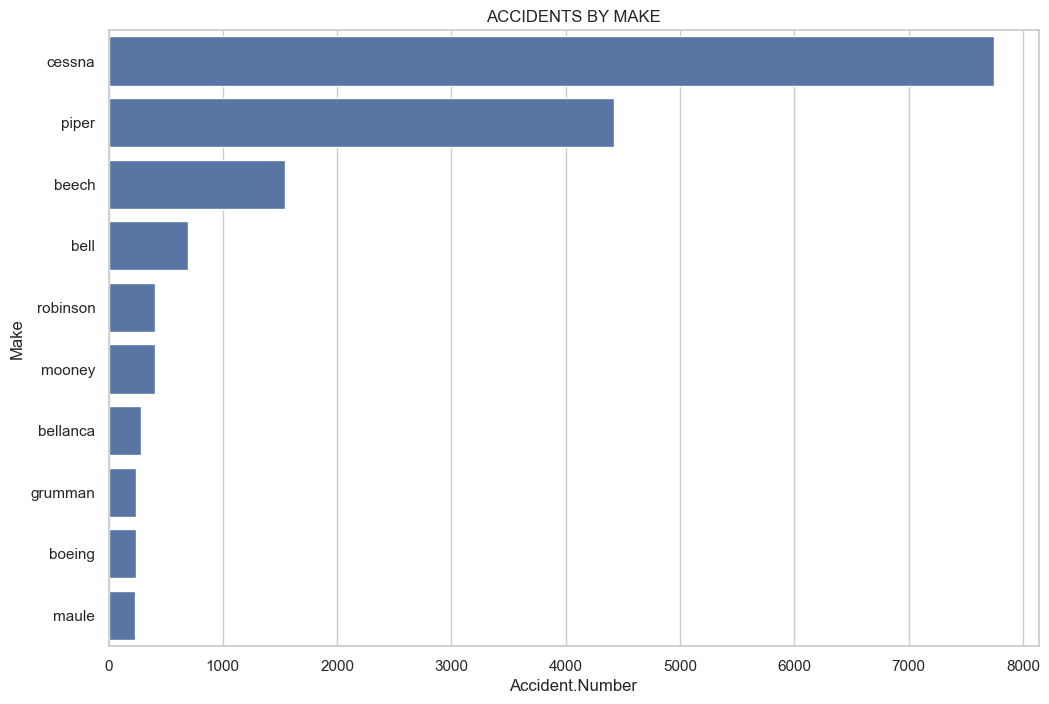

In [84]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Accident.Number", y='Make', data=Top_Ten_Aircrafts)
plt.title('ACCIDENTS BY MAKE')
plt.xlabel('Accident.Number')
plt.ylabel('Make')
plt.show

More fitering to enable plotting the line plot

In [85]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['year'] = df['Event.Date'].dt.year
accidents_by_year = df.groupby('year').size().reset_index(name='Accident.Count')
accident_trends = df.groupby(['year', 'Make']).size().reset_index(name='Accident.Count')
top_ten_makes=top_ten_aircrafts['Make'].tolist()
accident_trends_top_ten = accident_trends[accident_trends['Make'].isin(top_ten_makes)]
print(accident_trends)


      year              Make  Accident.Count
0     1982             adams               1
1     1982    aero commander              17
2     1982           aeronca              29
3     1982     aeronca champ               1
4     1982  aeronca champion               1
...    ...               ...             ...
7126  2022    wingren norman               1
7127  2022     wren ronnie d               1
7128  2022          yakovlev               2
7129  2022      yates mike e               1
7130  2022            zenith               5

[7131 rows x 3 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

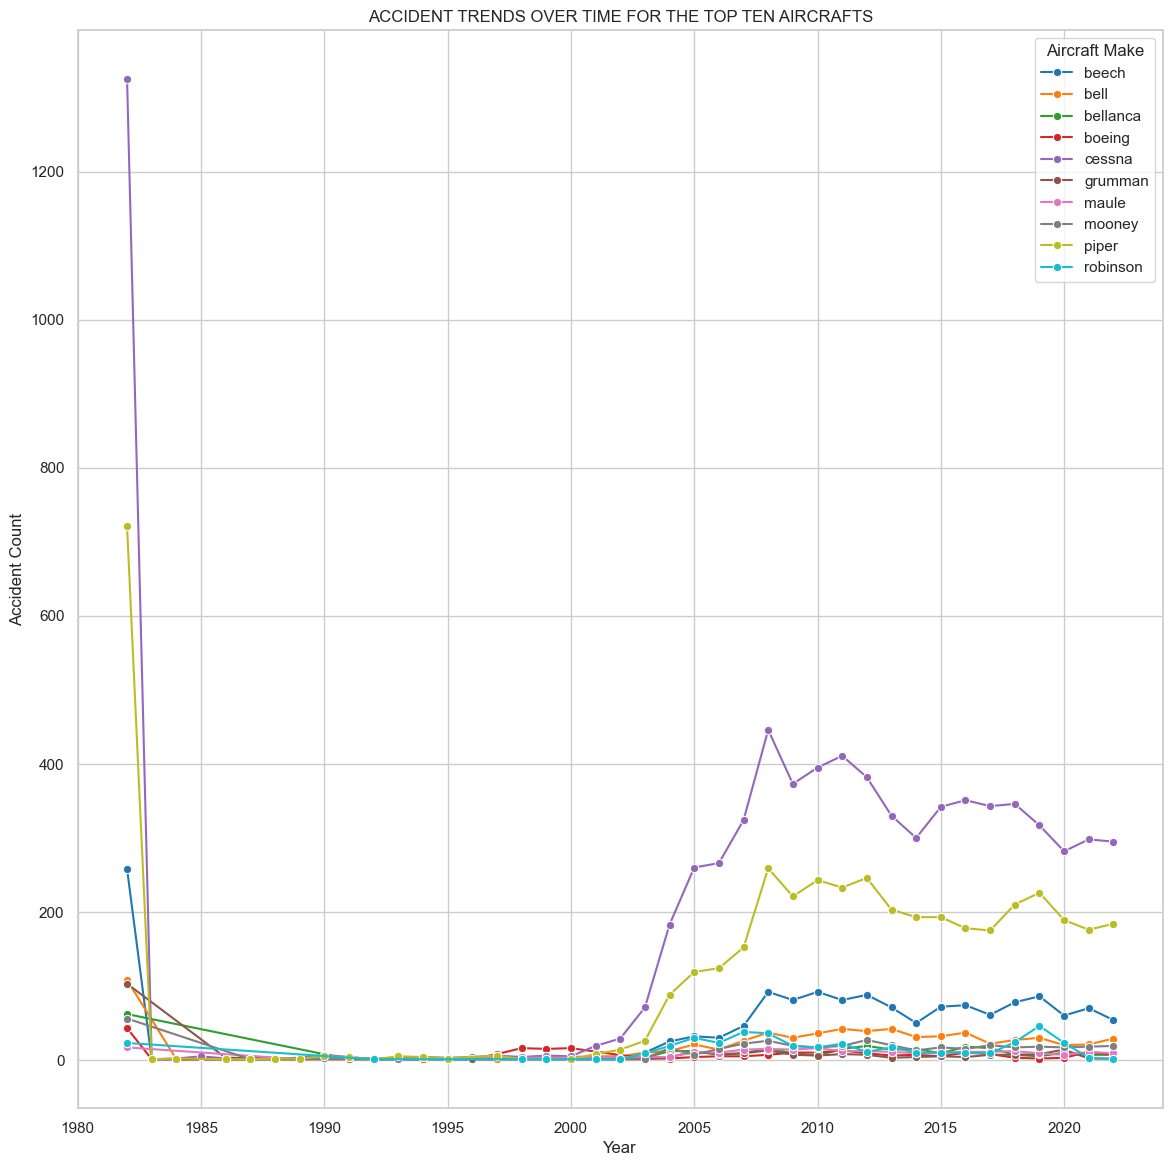

In [88]:
plt.figure(figsize=(14,14))
sns.lineplot(x='year',y='Accident.Count', hue='Make', data=accident_trends_top_ten , marker='o',palette="tab10")
plt.title('ACCIDENT TRENDS OVER TIME FOR THE TOP TEN AIRCRAFTS')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.legend(title='Aircraft Make')
plt.grid(True)
plt.show